Analysis for:  phillip.allen@enron.com


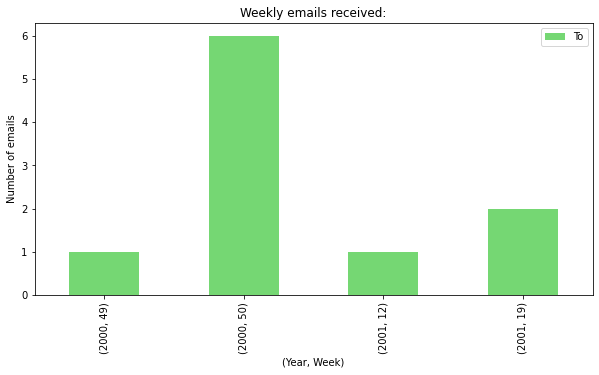

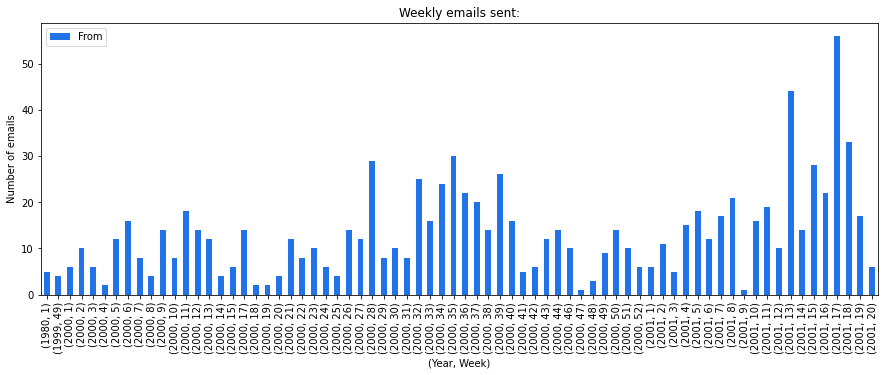

In [239]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
from matplotlib import pyplot as plt

df = pd.read_csv("enron_test.csv") 
df["new_date"] = df["new_date"].astype("datetime64")

# email = input("Enter Email for Analysis:")
email = 'phillip.allen@enron.com'
from_filter = df['From'].apply(lambda x: email in str(x))
to_filter = df['To'].apply(lambda x: email in str(x))


to_filtered_data = df.loc[to_filter][['To']]
from_filtered_data = df.loc[from_filter][['From']]

print("Analysis for: ", email)
if to_filtered_data.size > 0:
  to_filtered_data.groupby([df["new_date"].dt.year, df["new_date"].dt.isocalendar().week]).count().plot(kind="bar", figsize=(10,5), color='#75d773', title = "Weekly emails received:", xlabel = '(Year, Week)', ylabel = 'Number of emails')
else:
  print("NO emails received!")

if from_filtered_data.size > 0:
  from_filtered_data.groupby([df["new_date"].dt.year, df["new_date"].dt.isocalendar().week]).count().plot(kind="bar", figsize=(15,5), color='#2173e7', title = "Weekly emails sent:", xlabel = '(Year, Week)', ylabel = 'Number of emails')
else:
  print("NO emails sent!")

plt.show()

Top 50 Keywords in received email with score: 
[(9.0, 'whole thing late'), (9.0, 'west gas originations'), (9.0, 'we still haven'), (9.0, 'time tomorrow as'), (9.0, 'susan j mara'), (9.0, 'steven j kean'), (9.0, 'rebecca w cantrell'), (9.0, 'particuarly since this'), (9.0, 'jane m tholt'), (9.0, 'james d steffes'), (9.0, 'denver piece combined'), (9.0, 'dc 20006 phone'), (8.75, 'pivot at 795'), (8.75, 'pivot at 50'), (8.75, 'my stab at'), (8.666666666666666, 'provide you with'), (8.666666666666666, 'apparently on such'), (8.6, 'primary objectives of'), (8.6, 'note of caution'), (8.6, 'lot of guesswork'), (8.6, 'ballpark of reality'), (8.5, 'tiffany miller 5'), (8.5, 'richard b sanders'), (8.5, 'as prices rose'), (8.428571428571429, '32 pm to'), (8.333333333333334, 'pivot table for'), (8.333333333333334, 'meeting with staff'), (8.333333333333334, 'emissions strategy meeting'), (8.25, 'phillip k allen'), (8.166666666666666, 'information you have'), (8.095238095238095, 'on december 12'), 

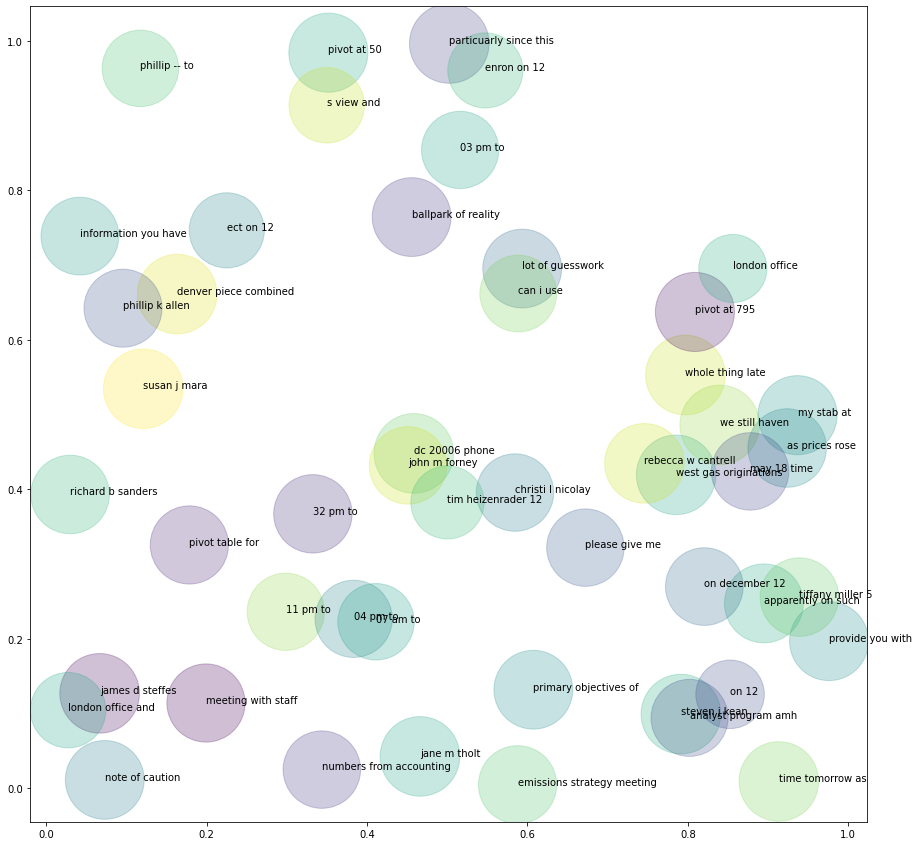

In [286]:
# %pip install rake-nltk
# %%python -c "import nltk; nltk.download('stopwords')"

from rake_nltk import Metric, Rake

to_filtered_data = df.loc[to_filter][['content']]
from_filtered_data = df.loc[from_filter][['content']]

print("Top 50 Keywords in received email with score: ")
r = Rake(min_length=1, max_length=3, stopwords=["\/","@",":","the", "an", "a", "is","/?", "=", "<", ">,", "\\", "\"", "com", "\n", "----------------------", "---------------------------"])
r.extract_keywords_from_sentences(to_filtered_data["content"])
received_keywords = r.get_ranked_phrases_with_scores()[0:50]
print(received_keywords)

print("\nTop 50 Keywords in sent email with score: ")
r.extract_keywords_from_sentences(from_filtered_data["content"])
sent_keywords = r.get_ranked_phrases_with_scores()[0:50]
print(sent_keywords)

# create data
x = np.random.rand(50)
y = np.random.rand(50)
zi = list(reversed(range(51)))[0:50]
#scatter plot size based on keyword score
size = [np.log2(kw[0])*2000 for kw in received_keywords]

colors = np.random.rand(50)
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x, y, s=size,c=colors, alpha=0.25)

for i, txt in enumerate(received_keywords):
    ax.annotate(txt[1], (x[i], y[i]))

plt.show()